In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in /opt/anaconda3/lib/python3.8/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [4]:
initial_data = yf.download("AMZN", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000


In [6]:

initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-26,3198.739990,3282.979980,3153.300049,3207.040039,3207.040039,5901200
2020-10-27,3224.939941,3291.659912,3211.300049,3286.330078,3286.330078,4291000
2020-10-28,3249.300049,3264.020020,3162.469971,3162.780029,3162.780029,5588300
2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500
2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386400


In [7]:
initial_data['Adj Close'].head()

Date
2020-01-02    1898.010010
2020-01-03    1874.969971
2020-01-06    1902.880005
2020-01-07    1906.859985
2020-01-08    1891.969971
Name: Adj Close, dtype: float64

In [9]:
initial_data['Adj Close'].tail()

Date
2020-10-26    3207.040039
2020-10-27    3286.330078
2020-10-28    3162.780029
2020-10-29    3211.010010
2020-10-30    3036.149902
Name: Adj Close, dtype: float64

In [10]:
data =  initial_data['Adj Close']


In [11]:
data

Date
2020-01-02    1898.010010
2020-01-03    1874.969971
2020-01-06    1902.880005
2020-01-07    1906.859985
2020-01-08    1891.969971
                 ...     
2020-10-26    3207.040039
2020-10-27    3286.330078
2020-10-28    3162.780029
2020-10-29    3211.010010
2020-10-30    3036.149902
Name: Adj Close, Length: 211, dtype: float64

In [12]:
data.head()

Date
2020-01-02    1898.010010
2020-01-03    1874.969971
2020-01-06    1902.880005
2020-01-07    1906.859985
2020-01-08    1891.969971
Name: Adj Close, dtype: float64

In [13]:
data.tail()

Date
2020-10-26    3207.040039
2020-10-27    3286.330078
2020-10-28    3162.780029
2020-10-29    3211.010010
2020-10-30    3036.149902
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

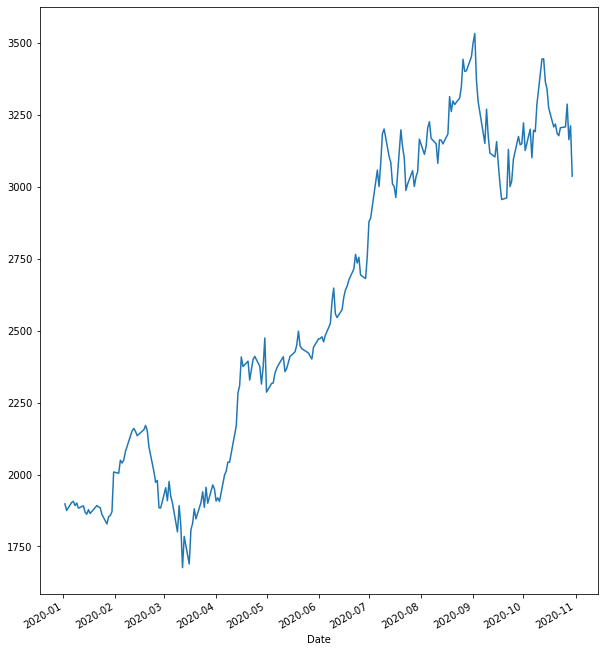

In [14]:
data.plot(figsize=(10, 12), subplots=True)

In [15]:
data.describe().round(2)

count     211.00
mean     2583.27
std       546.55
min      1676.61
25%      2010.45
50%      2478.40
75%      3138.56
max      3531.45
Name: Adj Close, dtype: float64

In [16]:
data.diff().head()

Date
2020-01-02          NaN
2020-01-03   -23.040039
2020-01-06    27.910034
2020-01-07     3.979980
2020-01-08   -14.890015
Name: Adj Close, dtype: float64

In [17]:
data.diff().describe().round(2)

count    210.00
mean       5.42
std       64.50
min     -187.96
25%      -32.91
50%        9.14
75%       38.43
max      234.87
Name: Adj Close, dtype: float64

In [18]:
data.pct_change().round(4).head()

Date
2020-01-02       NaN
2020-01-03   -0.0121
2020-01-06    0.0149
2020-01-07    0.0021
2020-01-08   -0.0078
Name: Adj Close, dtype: float64

In [19]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2020-01-02       NaN
2020-01-03   -0.0122
2020-01-06    0.0148
2020-01-07    0.0021
2020-01-08   -0.0078
Name: Adj Close, dtype: float64

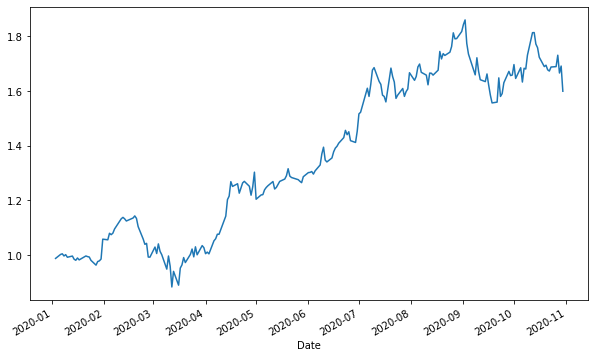

In [20]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [21]:
data.resample('1w', label='right').last().head()

Date
2020-01-05    1874.969971
2020-01-12    1883.160034
2020-01-19    1864.719971
2020-01-26    1861.640015
2020-02-02    2008.719971
Freq: W-SUN, Name: Adj Close, dtype: float64

In [22]:
data.resample('1m', label='right').last().head()

Date
2020-01-31    2008.719971
2020-02-29    1883.750000
2020-03-31    1949.719971
2020-04-30    2474.000000
2020-05-31    2442.370117
Freq: M, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

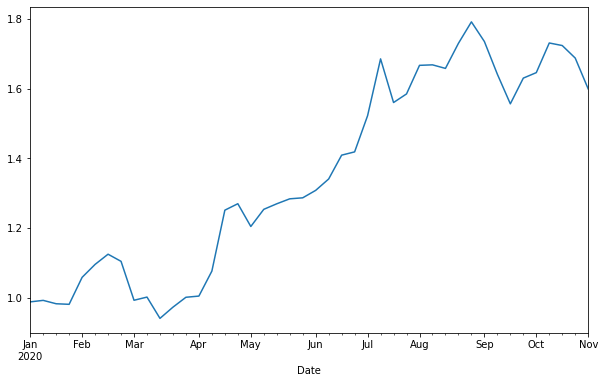

In [23]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

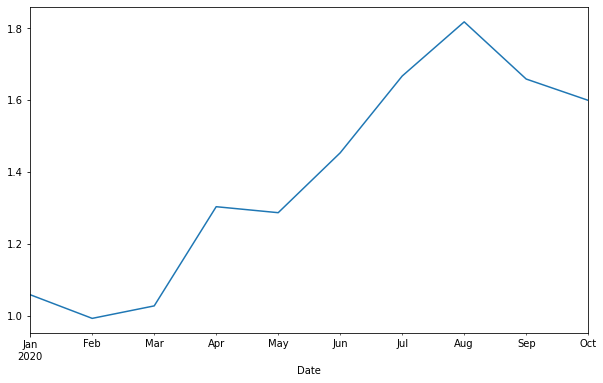

In [24]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [26]:
data = yf.download("AMZN TSLA", start="2020-01-01", end="2020-10-31")


[*********************100%***********************]  2 of 2 completed


In [27]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2020-01-02 to 2020-10-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    211 non-null    float64
 1   TSLA    211 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


In [29]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2020-10-26,3207.040039
2020-10-27,3286.330078
2020-10-28,3162.780029
2020-10-29,3211.010010
2020-10-30,3036.149902


In [30]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2020-10-26,3207.040039,3233.527454,3216.449988
2020-10-27,3286.330078,3240.599963,3219.357324
2020-10-28,3162.780029,3241.302466,3219.756490
2020-10-29,3211.010010,3240.789966,3219.856156
2020-10-30,3036.149902,3236.347461,3216.708655


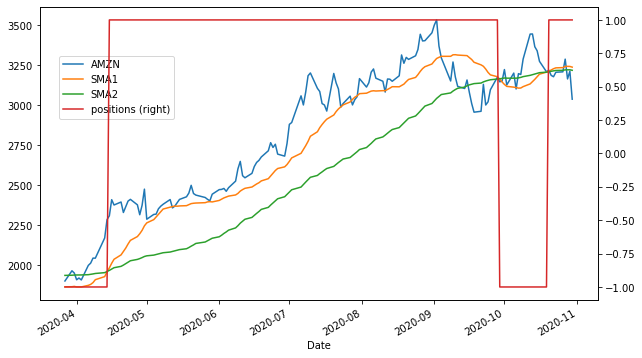

In [31]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [34]:
AMZN = yf.download("AMZN", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [35]:
S = AMZN['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 3036.15 .


In [36]:
log_return = np.log(AMZN['Adj Close'] / AMZN['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 40.06 %


In [37]:
log_return = np.log(AMZN['Adj Close'] / AMZN['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return[-23:-1].std()
print('The monthly volatility is', round(vol_h*100,2), '%')

The monthly volatility is 36.06 %


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [76]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [110]:
euro_option_bs(3036, 2000, 1, 0.9, 0.4, 'call')

2222.9412375417255

In [111]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 2000, 1, 0.9, 0.4, 'call')

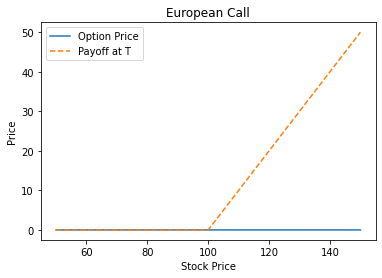

In [112]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [114]:
euro_option_bs(3036, 2000, 1, 0.9, 0.4, 'put')

0.08055702292377176

In [115]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 2000, 1, 0.9, 0.4, 'put')

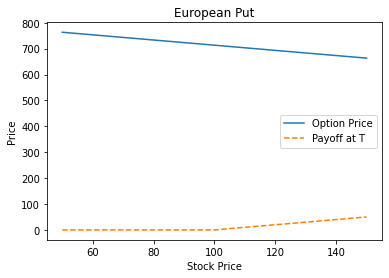

In [116]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [118]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [119]:
delta(3036, 2000, 1, 0.9, 0, 0.4, 'call')

0.999761619399948

In [120]:
delta(3036, 2000, 1, 0.9,0, 0.4, 'put')

-0.0002383806000519757

In [121]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 2000, 1, 0.9, 0, 0.4, 'call')
    Delta_Put [i] = delta(S[i], 2000, 1, 0.9,0, 0.4, 'put')

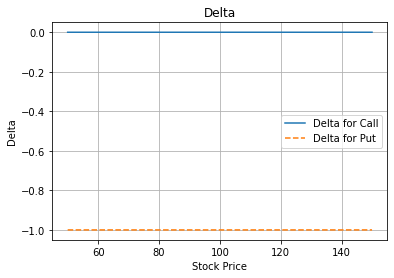

In [122]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [123]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [124]:
gamma(3036, 2000, 1, 0.9, 0, 0.4, 'call')

2.988990760869879e-07

In [125]:
gamma(3036, 2000, 1, 0.9,0, 0.4, 'put')

2.988990760869879e-07

In [126]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 2000, 1, 0.9, 0, 0.4, 'call')

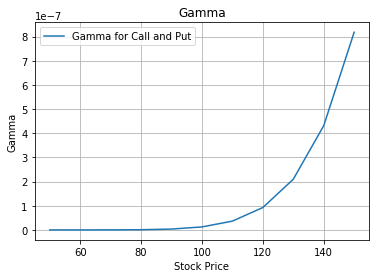

In [127]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [128]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [129]:
theta(3036, 2000, 1, 0.9, 0, 0.4, 'call')

731.6436397049109

In [130]:
theta(3036, 2000, 1, 0.9,0, 0.4, 'put')

1.2659571162595171

In [131]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(3036, 2000, T[i], 0.9, 0, 0.4, 'call')
    Theta_Put [i] = theta(3036, 2000, T[i], 0.9, 0, 0.4, 'put')

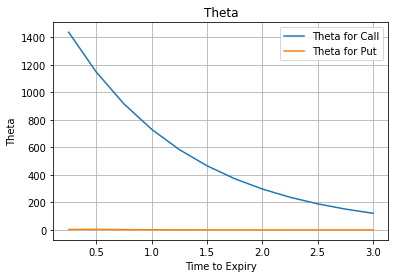

In [132]:
ig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [99]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [133]:
rho(3036, 2000, 1, 0.9, 0, 0.4, 'call')

812.3350389565165

In [134]:
rho(3036, 2000, 1, 0.9,0, 0.4, 'put')

-0.80428052468157

In [135]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(3036, 2000, 1, r[i], 0, 0.4, 'call')
    Rho_Put [i] = rho(3036, 2000, 1, r[i], 0, 0.4, 'put')

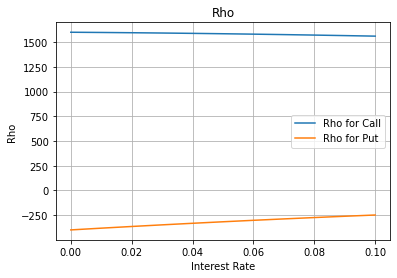

In [136]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [104]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [137]:
vega(3036, 2000, 1, 0.9, 0, 0.4, 'call')

2.7105232202305207

In [138]:
vega(3036, 2000, 1, 0.9,0, 0.4, 'put')

2.7105232202305207

In [139]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(3036, 2000, 1, 0.9, 0, vol[i], 'call')

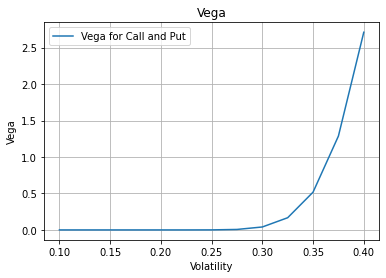

In [140]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [109]:
import numpy as np
import os

In [141]:
S0 = 3036                     # spot stock price
K = 2000                      # strike
T = 1                       # maturity 
r = 0.9                     # risk free rate 
sig = 0.4                  # diffusion coefficient or volatility
N = 3                       # number of periods or number of time steps  
payoff = "call"             # payoff

In [142]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [154]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [155]:
S

array([[3036.        , 3824.70357372, 4818.29954771, 6070.01564538],
       [   0.        , 2409.93735131, 3036.        , 3824.70357372],
       [   0.        ,    0.        , 1912.97695561, 2409.93735131],
       [   0.        ,    0.        ,    0.        , 1518.49625083]])

In [145]:
S[0,1]

3824.7035737217366

In [146]:
S[1,1]

2409.937351309777

In [147]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

1.1932953739966934

In [148]:
q

-0.1932953739966934

In [149]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        , 4070.01564538],
       [   0.        ,    0.        ,    0.        , 1824.70357372],
       [   0.        ,    0.        ,    0.        ,  409.93735131],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

In [150]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[2221.44684457, 2727.08030153, 3336.66310634, 4070.01564538],
       [   0.        , 1322.18746032, 1554.36355864, 1824.70357372],
       [   0.        ,    0.        ,  362.39074946,  409.93735131],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

In [151]:
print('European ' + payoff, str( V[0,0]))

European call 2221.4468445674784


In [152]:
S0 = 3036                     # spot stock price
K = 2000                      # strike
T = 1                       # maturity 
r = 0.9                     # risk free rate 
sig = 0.4                  # diffusion coefficient or volatility
N = 3                       # number of periods or number of time steps  
payoff = "put"             # payoff

In [153]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [156]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [157]:
S

array([[3036.        , 3824.70357372, 4818.29954771, 6070.01564538],
       [   0.        , 2409.93735131, 3036.        , 3824.70357372],
       [   0.        ,    0.        , 1912.97695561, 2409.93735131],
       [   0.        ,    0.        ,    0.        , 1518.49625083]])

In [158]:
S[0,1]

3824.7035737217366

In [159]:
S[1,1]

2409.937351309777

In [160]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

1.1932953739966934

In [161]:
q

-0.1932953739966934

In [162]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 481.50374917]])

In [163]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ -1.41383595,   0.        ,   0.        ,   0.        ],
       [  0.        ,   9.8733812 ,   0.        ,   0.        ],
       [  0.        ,   0.        , -68.94976479,   0.        ],
       [  0.        ,   0.        ,   0.        , 481.50374917]])

In [164]:
print('European ' + payoff, str( V[0,0]))

European put -1.4138359513231933


In [165]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [166]:
T = 1
r = 0.9
sigma = 0.4
S0 = 3036
K = 2000

In [167]:
S = mcs_simulation_np(1000)

In [168]:
S = np.transpose(S)
S

array([[3036.        , 3102.52958592, 3204.49513197, ..., 7066.95004774,
        6980.2780311 , 7000.43291228],
       [3036.        , 3080.2850707 , 3088.38712057, ..., 5001.76291159,
        5064.89948671, 5072.11480774],
       [3036.        , 3094.57848563, 3045.42506986, ..., 6922.74509371,
        6872.76906236, 6762.85872248],
       ...,
       [3036.        , 3055.46741082, 3036.68863582, ..., 3263.78489687,
        3220.2262481 , 3250.12668882],
       [3036.        , 3058.44874349, 3068.24360974, ..., 5212.97133985,
        5253.04872685, 5208.53028269],
       [3036.        , 3008.19000605, 2966.78417933, ..., 8853.55671323,
        8772.90426491, 8637.08957615]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

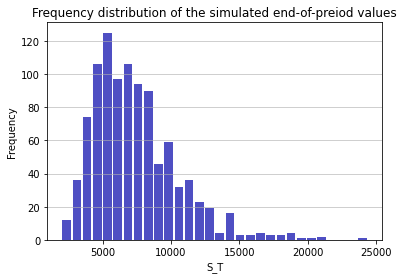

In [169]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [170]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.0


In [171]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 5372.599948955983
